# 🧪 Data Cleaning Validation Notebook

**Notebook Purpose:**  
This notebook is intended to test and validate the functionality of the `dataset.py` module during development.  
It will be used to:
- Load raw and cleaned data.
- Visualize key distributions and data issues.
- Confirm that cleaning steps (e.g., outlier removal, null handling) are behaving as expected.
- Help debug issues before formalizing into automated tests.

---

### ✅ Suggested Sections:
1. **Imports & Setup**  
2. **Raw Data Overview**  
3. **Apply Cleaning Functions**  
4. **Visual Inspection (Histograms, Boxplots, etc.)**  
5. **Validation Checks & Assertions**
6. **Notes & Next Steps**


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from music_and_mental_health_survey_analysis.config import PROCESSED_DATA_DIR, RAW_DATA_DIR

In [24]:
df = pd.read_csv(PROCESSED_DATA_DIR / 'processed_dataset.csv')
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1.0,1.0,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1.0,0.0,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0.0,1.0,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1.0,1.0,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1.0,0.0,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


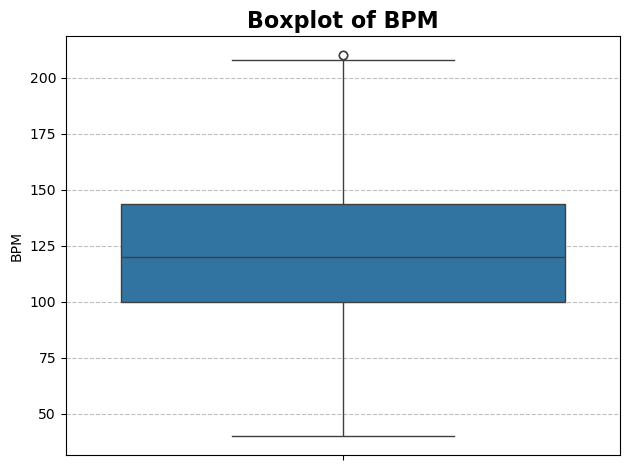

In [25]:
# Visualize BPM
plt.title('Boxplot of BPM', fontsize=16, fontweight='bold')
sns.boxplot(df['BPM'])
plt.grid(axis='y', alpha=0.5, linestyle='--', color='gray')

plt.tight_layout()
plt.show()

In [26]:
df['Age'].describe()

count    719.000000
mean      24.990264
std       11.615409
min       10.000000
25%       18.000000
50%       21.000000
75%       27.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
illness = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df[illness].describe()

,Anxiety,Depression,Insomnia,OCD
count,719.000000,718.000000,719.000000,718.000000
mean,5.830320,4.779944,3.724618,2.603064
std,2.785082,3.019054,3.067821,2.813068
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           719 non-null    float64
 1   Primary streaming service     719 non-null    object 
 2   Hours per day                 720 non-null    float64
 3   While working                 717 non-null    float64
 4   Instrumentalist               716 non-null    float64
 5   Composer                      719 non-null    float64
 6   Fav genre                     720 non-null    object 
 7   Exploratory                   720 non-null    float64
 8   Foreign languages             716 non-null    float64
 9   BPM                           614 non-null    float64
 10  Frequency [Classical]         720 non-null    object 
 11  Frequency [Country]           720 non-null    object 
 12  Frequency [EDM]               720 non-null    object 
 13  Frequ

In [29]:
df.columns[df.isna().sum()>0]

Index(['Age', 'Primary streaming service', 'While working', 'Instrumentalist',
       'Composer', 'Foreign languages', 'BPM', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

In [30]:
df['Frequency [Classical]']

0               Rarely
1            Sometimes
2                Never
3            Sometimes
4                Never
            ...       
715    Very frequently
716             Rarely
717             Rarely
718    Very frequently
719          Sometimes
Name: Frequency [Classical], Length: 720, dtype: object

In [31]:
df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Fav genre                        object
Exploratory                     float64
Foreign languages               float64
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


In [32]:
raw_df = pd.read_csv(RAW_DATA_DIR / 'mxmh_survey_results.csv')
raw_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [33]:
raw_df['BPM'].isna().sum()

np.int64(107)

In [34]:
df['BPM'].isna().sum()

np.int64(106)

In [35]:
df.isna().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             106
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           1
Depression                  

In [36]:
df['Age'].describe()

count    719.000000
mean      24.990264
std       11.615409
min       10.000000
25%       18.000000
50%       21.000000
75%       27.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
raw_df['Age'].describe()

count    735.000000
mean      25.206803
std       12.054970
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

In [38]:
set(raw_df['Primary streaming service'].unique())

{'Apple Music',
 'I do not use a streaming service.',
 'Other streaming service',
 'Pandora',
 'Spotify',
 'YouTube Music',
 nan}

In [39]:
set(raw_df['Fav genre'].unique())

{'Classical',
 'Country',
 'EDM',
 'Folk',
 'Gospel',
 'Hip hop',
 'Jazz',
 'K pop',
 'Latin',
 'Lofi',
 'Metal',
 'Pop',
 'R&B',
 'Rap',
 'Rock',
 'Video game music'}

In [40]:
set(df[illness].value_counts().unique())

{np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(9)}

In [41]:
df[illness].value_counts()

Anxiety  Depression  Insomnia  OCD
0.0      0.0         0.0       0.0    9
1.0      0.0         0.0       0.0    5
2.0      0.0         0.0       0.0    4
4.0      2.0         0.0       0.0    4
7.0      8.0         6.0       2.0    4
                                     ..
5.0      6.0         6.0       1.0    1
                               3.0    1
                     7.0       7.0    1
                     9.0       9.0    1
         5.0         7.0       0.0    1
Name: count, Length: 633, dtype: int64

In [42]:
df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Fav genre                        object
Exploratory                     float64
Foreign languages               float64
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object
